In [50]:
import numpy as np
import scipy
from scipy import misc
from matplotlib import pyplot, cm
from numpy.linalg import eig, inv, norm
import matplotlib.pyplot as plt

def GetPointEdges(Points,SigmaDistance,EdgeRadius):
    """This function constructs a graph describing similarity of points in the given 
       array.
      \param Points An array of shape (nPoint,2) where each row provides the 
             coordinates of one of nPoint points in the plane.
      \param SigmaDistance The standard deviation of the Gaussian distribution used 
             to weigh down longer edges.
      \param EdgeRadius A positive float providing the maximal length of edges.
      \return A tuple (EdgeWeight,EdgeIndices) where EdgeWeight is an array of 
              length nEdge providing the weight of all produced edges and 
              EdgeIndices is an integer array of shape (nEdge,2) where each row 
              provides the indices of two pixels which are connected by an edge."""
    eW = []
    eI = []
    for i, pointi in enumerate(Points):
        for j, pointj in enumerate(Points):
            """if i==j:
                continue"""
            dist = (pointi[0]-pointj[0])**2
            dist += (pointi[1]-pointj[1])**2
            if (dist**.5)<=EdgeRadius:
                wij = (pointi[0]-pointj[0])**2
                wij += (pointi[1]-pointj[1])**2
                wij /= 2*(SigmaDistance**2)
                wij = np.exp(-wij)
                """wij is higher the closer the edges are. 
                It is 1 if they are at the same place and close 
                to 0 as they distance from each other. """
                eW+= [wij]
                eI+= [(i,j)]
    return (eW, eI)
    

def GetLaplacian(nVertex,EdgeWeight,EdgeIndices):
    """Constructs a matrix providing the Laplacian for the given graph. 
      \param nVertex The number of vertices in the graph (resp. pixels in the 
             image).
      \param EdgeWeight A one-dimensional array of nEdge floats providing the weight 
             for each edge.
      \param EdgeIndices An integer array of shape (nEdge,2) where each row provides 
             the vertex indices for one edge.
      \return A matrix providing the Laplacian for the given graph."""
    deg = np.zeros((nVertex, nVertex), dtype=float) # degree
    aff = np.zeros((nVertex, nVertex), dtype=float) # affinity
    for w, (i,j) in zip(EdgeWeight, EdgeIndices):
        aff[i][j] += w
        deg[i][i] += w
    # if I use the normalized Laplacian, I get a non positive-semidefinite
    # return np.identity(nVertex)-np.matmul(inv(deg),aff) 
    return deg-aff 

def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0:
        return v
    return v / norm

def GetFiedlerVector(Laplacian):
    """Given the Laplacian matrix of a graph this function computes the normalized 
       Eigenvector for its second-smallest Eigenvalue (the so-called Fiedler vector) 
       and returns it."""
    val, vec = eig(Laplacian)
    assert np.all(val>=0), "Laplacian is not positive semidefinite"
    decomp = [(x[0],x[1]) for x in zip(val, vec)]
    decomp = sorted(decomp, key=lambda x: x[0])
    print(sorted(val))
    
    # return the vector corresponding to the second smallest value
    return normalize(decomp[1][1])

if(__name__=="__main__"):
    # This list of points is to be clustered
    Points=np.asarray([(-8.097,10.680),(-3.902,8.421),(-9.711,7.372),(0.859,12.859),(4.732,11.084),(-0.594,9.147)\
                       ,(-4.224,13.585),(-9.066,11.891),(-13.181,8.663),(-12.374,3.983),(-11.406,-2.068),(-9.630,2.854),\
                       (-13.665,-6.667),(-15.521,-0.454),(-15.117,-6.587),(-11.970,-10.621),(-6.000,-12.799),(-2.853,-14.978)\
                       ,(-8.501,-10.217),(2.311,-11.670),(3.441,-14.171),(5.861,-10.137),(10.138,-6.909),(15.382,-5.215),\
                       (14.091,0.675),(11.187,3.903),(8.685,8.502),(7.879,11.649),(5.216,10.680),(11.025,6.888),(13.446,2.612),\
                       (12.962,-7.393),(8.363,-9.330),(-0.594,-0.212),(1.666,1.401),(1.424,-1.019),(-0.351,-2.552),\
                       (-2.127,0.675),(-0.271,2.128),(-4.743,-4.016)]);
    nVertex=Points.shape[0];
    
    """ The clustered points should be the last 6 on the array. """
    
    # Construct the graph for the points
    EdgeWeight,EdgeIndices=GetPointEdges(Points,1.8,7.0);
    # Construct the Laplacian matrix for the graph
    Laplacian=GetLaplacian(nVertex,EdgeWeight,EdgeIndices);
    # Compute the Fiedler vector
    FiedlerVector=GetFiedlerVector(Laplacian);
1==2

[1.43774503100567e-16, 9.918061652236828e-05, 0.0013165555720076217, 0.0027523348132514275, 0.008473585808006641, 0.023121953691466766, 0.039025541781637724, 0.04650876043868273, 0.05487279561325766, 0.06537758328041685, 0.07169698947007815, 0.09087289579096841, 0.11134973279190728, 0.11891908842052498, 0.13101695467204458, 0.1782121033294252, 0.17988466331467048, 0.20672459562623213, 0.27934152754249725, 0.3177340453303214, 0.40067095590138796, 0.4393706736824795, 0.4756461241322334, 0.4759427220256809, 0.5966794469510758, 0.669803691901866, 0.6931074858934011, 0.7799547512769252, 0.8932010183047309, 1.0197054265704386, 1.0232040589085143, 1.035687246054863, 1.3493512496720284, 1.3938368037503928, 1.4965369745565258, 1.5188128465781487, 1.8834184576786681, 2.1321246726301837, 2.23624940222443, 2.7627873713035105]


False

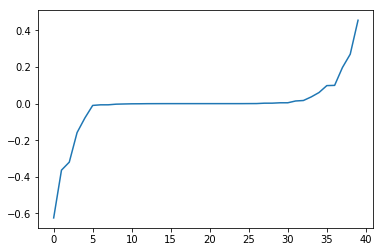

In [51]:
    # 1 d
    plt.plot(sorted(FiedlerVector))
    plt.show()    

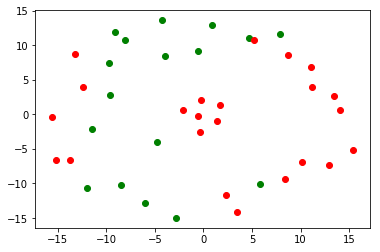

In [54]:
    """define the conditions"""
    #threshold = (min(FiedlerVector) + max(FiedlerVector)) / 2
    #threshold = 0
    
    """
    c1 = Points[FiedlerVector>threshold]
    c2 = Points[FiedlerVector<=threshold]
    """
    
    filt = np.all([-0.001< FiedlerVector,FiedlerVector <0.001], axis=0)
    #filt = np.all([FiedlerVector >0.01], axis=0)
    c1 = Points[filt]
    c2 = Points[[not x for x in filt]]
    
    
    # Show the results
    plt.scatter(c1[:,0], c1[:,1], color = 'g', marker = 'o')
    plt.scatter(c2[:,0], c2[:,1], color = 'r', marker = 'o')
    plt.show()

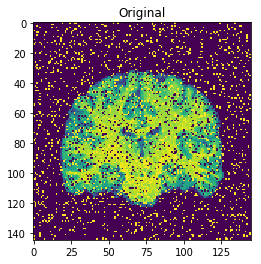

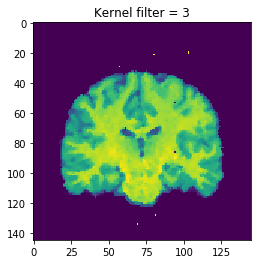

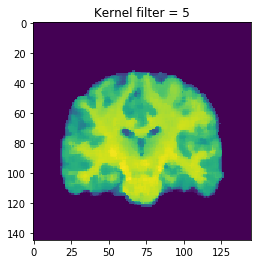

In [12]:
# Exercise 2 a

#from scipy import misc
import imageio
from scipy import signal#, ndimage
#import skimage
import numpy as np
import matplotlib.pyplot as plt

img = imageio.imread('brain-noisy.png')
plt.imshow(img)
plt.title("Original")
plt.show()

medfil3 = signal.medfilt2d(img, 3)
plt.imshow(medfil3)
plt.title("Kernel filter = 3")
plt.show()


"""
with kernel==5 the resulting image gets blurry, but there is no salt and pepper noise
"""
medfil5 = signal.medfilt2d(img, 5)
plt.imshow(medfil5)
plt.title("Kernel filter = 5")
plt.show()

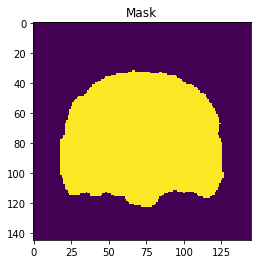

In [13]:
# 2 b
mask = medfil5>0
plt.imshow(mask)
plt.title("Mask")
plt.show()

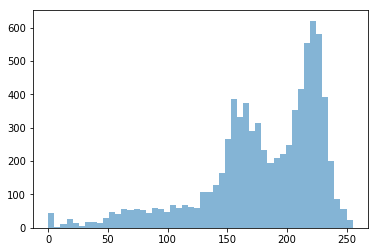

In [23]:
#2 c
plt.hist(medfil3[mask], bins=50, alpha=0.55, label='Hist')
plt.show()

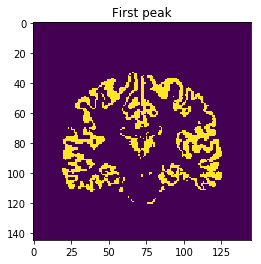

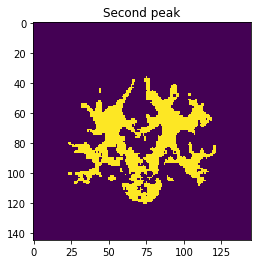

In [38]:
peak1=np.all([medfil3>155, medfil3<=195], axis=0)
plt.imshow(peak1)
plt.title("First peak")
plt.show()

peak2=np.all([medfil3>205, medfil3<=235], axis=0)
plt.imshow(peak2)
plt.title("Second peak")
plt.show()

In [ ]:
# 2 d
